# Практическая работа 2. Карагяур Александр Иванович. ММР213.
## Задача: проанализировать датасет, используя пройденные в течение курса инструменты анализа

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('C:/Users/akaragyaur/DataFrames/Practice2/Consumer_spending_habits.csv')
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


In [3]:
# Нам представленны данные о продажах магазина велосипедов за 2015-2016г в нескольких странах
#Column name	Description
#Date	Date of the sale. (Date)
#Year	Year of the sale. (Integer)
#Month	Month of the sale. (Integer)
#Customer Age	Age of the customer. (Integer)
#Customer Gender	Gender of the customer. (String)
#Country	Country of the customer. (String)
#State	State of the customer. (String)
#Product Category	Category of the product. (String)
#Sub Category	Sub-category of the product. (String)
#Quantity	Quantity of the product sold/purchased. (Integer)
#Unit Cost	Cost of the product per unit. (Float)
#Unit Price	Price of the product per unit. (Float)
#Revenue	Total revenue generated from the sale. (Float)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [6]:
# убираем пропущенные значения
df = df.drop(34866)

In [19]:
df.head(0)

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit


In [7]:
df['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Germany'],
      dtype=object)

In [8]:
df['Product Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [9]:
df['Sub Category'].unique()

array(['Tires and Tubes', 'Gloves', 'Helmets', 'Bike Stands',
       'Mountain Bikes', 'Hydration Packs', 'Jerseys', 'Fenders',
       'Cleaners', 'Socks', 'Caps', 'Touring Bikes', 'Bottles and Cages',
       'Vests', 'Road Bikes', 'Bike Racks', 'Shorts'], dtype=object)

In [11]:
# переводим дату в нужный формат
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,2016-12-03,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,2016-12-03,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,NaN
34862,34862,2016-07-02,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,NaN
34863,34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,NaN
34864,34864,2015-05-04,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,NaN


In [12]:
# добавляем столбец с доходом от продаж
df['Income'] = df['Revenue'] - df['Cost']

In [13]:
# добавляем столбец с доходом от продаж за единицу
df['IncomePerUnit'] = df['Unit Price'] - df['Unit Cost']

In [133]:
# добавляем столбец с доходом от продаж за единицу в процентах
df['IncomePerUnitPercentage'] = (df['Unit Price'] - df['Unit Cost']) / df['Unit Price']
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,Weekday,IncomePerUnitPercentage,IncomePerUnitPe
0,0,2016-02-19,2016.0,February,29.0,0,United States,Accessories,Tires and Tubes,1.0,80.00,109.0,80.0,109.0,29.0,29.0,Friday,0.266055,29.0
1,1,2016-02-20,2016.0,February,29.0,0,United States,Clothing,Gloves,2.0,24.50,28.5,49.0,57.0,8.0,4.0,Saturday,0.140351,4.0
2,2,2016-02-27,2016.0,February,29.0,0,United States,Accessories,Tires and Tubes,3.0,3.67,5.0,11.0,15.0,4.0,1.3,Saturday,0.266000,1.3
3,3,2016-12-03,2016.0,March,29.0,0,United States,Accessories,Tires and Tubes,2.0,87.50,116.5,175.0,233.0,58.0,29.0,Saturday,0.248927,29.0
4,4,2016-12-03,2016.0,March,29.0,0,United States,Accessories,Tires and Tubes,3.0,35.00,41.7,105.0,125.0,20.0,6.7,Saturday,0.160671,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.00,1487.0,2049.0,1487.0,-562.0,-562.0,Sunday,-0.377942,-562.0
34862,34862,2016-07-02,2016.0,February,38.0,1,France,Bikes,Mountain Bikes,2.0,1160.00,985.5,2320.0,1971.0,-349.0,-174.5,Saturday,-0.177067,-174.5
34863,34863,2015-03-13,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.00,1583.0,2049.0,1583.0,-466.0,-466.0,Friday,-0.294378,-466.0
34864,34864,2015-05-04,2015.0,April,38.0,1,France,Bikes,Mountain Bikes,3.0,683.00,560.7,2049.0,1682.0,-367.0,-122.3,Monday,-0.218120,-122.3


In [137]:
# для удобства округлю данные до десятых
df['Unit Price'] = df['Unit Price'].round(1)
df['IncomePerUnit'] = df['IncomePerUnit'].round(1)
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,Weekday,IncomePerUnitPercentage
0,0,2016-02-19,2016.0,February,29.0,0,United States,Accessories,Tires and Tubes,1.0,80.00,109.0,80.0,109.0,29.0,29.0,Friday,0.266055
1,1,2016-02-20,2016.0,February,29.0,0,United States,Clothing,Gloves,2.0,24.50,28.5,49.0,57.0,8.0,4.0,Saturday,0.140351
2,2,2016-02-27,2016.0,February,29.0,0,United States,Accessories,Tires and Tubes,3.0,3.67,5.0,11.0,15.0,4.0,1.3,Saturday,0.266000
3,3,2016-12-03,2016.0,March,29.0,0,United States,Accessories,Tires and Tubes,2.0,87.50,116.5,175.0,233.0,58.0,29.0,Saturday,0.248927
4,4,2016-12-03,2016.0,March,29.0,0,United States,Accessories,Tires and Tubes,3.0,35.00,41.7,105.0,125.0,20.0,6.7,Saturday,0.160671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.00,1487.0,2049.0,1487.0,-562.0,-562.0,Sunday,-0.377942
34862,34862,2016-07-02,2016.0,February,38.0,1,France,Bikes,Mountain Bikes,2.0,1160.00,985.5,2320.0,1971.0,-349.0,-174.5,Saturday,-0.177067
34863,34863,2015-03-13,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.00,1583.0,2049.0,1583.0,-466.0,-466.0,Friday,-0.294378
34864,34864,2015-05-04,2015.0,April,38.0,1,France,Bikes,Mountain Bikes,3.0,683.00,560.7,2049.0,1682.0,-367.0,-122.3,Monday,-0.218120


In [59]:
# подкатегории товаров, которые принесли наибольшую прибыль
df.groupby('Sub Category')['Income'].sum().sort_values(ascending = False)

Sub Category
Helmets              518475.0
Tires and Tubes      512124.0
Jerseys              300876.0
Mountain Bikes       144627.0
Bottles and Cages    129567.0
Road Bikes            98166.0
Touring Bikes         94808.0
Shorts                87044.0
Hydration Packs       72341.0
Fenders               71403.0
Vests                 58344.0
Gloves                45817.0
Caps                  43610.0
Bike Racks            34894.0
Bike Stands           25301.0
Cleaners              14664.0
Socks                  9541.0
Name: Income, dtype: float64

In [60]:
# Добавим столбец с названиями недель, переведенными из даты 
df['Weekday'] = df['Date'].dt.day_name()
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,Weekday,IncomePerUnitPercentage
0,0,2016-02-19,2016.0,February,29.0,F,United States,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0,29.000000,Friday,0.266055
1,1,2016-02-20,2016.0,February,29.0,F,United States,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0,4.000000,Saturday,0.140351
2,2,2016-02-27,2016.0,February,29.0,F,United States,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0,1.330000,Saturday,0.266000
3,3,2016-12-03,2016.0,March,29.0,F,United States,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0,29.000000,Saturday,0.248927
4,4,2016-12-03,2016.0,March,29.0,F,United States,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0,6.666667,Saturday,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,M,France,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,-562.0,-562.000000,Sunday,-0.377942
34862,34862,2016-07-02,2016.0,February,38.0,M,France,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,-349.0,-174.500000,Saturday,-0.177067
34863,34863,2015-03-13,2015.0,March,38.0,M,France,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,-466.0,-466.000000,Friday,-0.294378
34864,34864,2015-05-04,2015.0,April,38.0,M,France,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,-367.0,-122.333333,Monday,-0.218193


In [61]:
# Проверим, какие категории продуктов продавались больше всего в каждый из дней недели
df.groupby(['Weekday', 'Product Category'])['Income'].sum()

Weekday    Product Category
Friday     Accessories         191795.0
           Bikes                38282.0
           Clothing             80242.0
Monday     Accessories         189758.0
           Bikes                41141.0
           Clothing             82221.0
Saturday   Accessories         204493.0
           Bikes                55077.0
           Clothing             76541.0
Sunday     Accessories         214467.0
           Bikes                44098.0
           Clothing             84459.0
Thursday   Accessories         178473.0
           Bikes                47319.0
           Clothing             75464.0
Tuesday    Accessories         212598.0
           Bikes                64413.0
           Clothing             72482.0
Wednesday  Accessories         187185.0
           Bikes                47271.0
           Clothing             73823.0
Name: Income, dtype: float64

In [62]:
# проверим, продажи в каких странах принесли больше всего прибыли
df.groupby('Country')['Income'].sum().sort_values(ascending = False)

Country
Germany           958825.0
United States     701165.0
United Kingdom    328955.0
France            272657.0
Name: Income, dtype: float64

In [63]:
# посмотрим, какие категории принесли больше всего прибыли
df.groupby('Product Category')['Revenue'].sum().sort_values(ascending = False)

Product Category
Bikes          11486355.0
Accessories     7420664.0
Clothing        3437557.0
Name: Revenue, dtype: float64

In [64]:
df.groupby(['Country', 'Product Category'])['Revenue'].sum().sort_values(ascending = False)

Country         Product Category
United States   Bikes               4733208.0
                Accessories         3723029.0
Germany         Bikes               2465427.0
United Kingdom  Bikes               2415117.0
United States   Clothing            1921505.0
France          Bikes               1872603.0
United Kingdom  Accessories         1309048.0
Germany         Accessories         1289410.0
France          Accessories         1099177.0
United Kingdom  Clothing             552055.0
Germany         Clothing             489673.0
France          Clothing             474324.0
Name: Revenue, dtype: float64

In [65]:
df.groupby(['Country', 'Product Category'])['Income'].sum().sort_values(ascending = False)

Country         Product Category
United States   Accessories         559709.0
Germany         Bikes               416069.0
                Accessories         398403.0
United States   Clothing            250219.0
United Kingdom  Accessories         226998.0
France          Accessories         193659.0
Germany         Clothing            144353.0
United Kingdom  Clothing             86326.0
France          Clothing             64334.0
United Kingdom  Bikes                15631.0
France          Bikes                14664.0
United States   Bikes              -108763.0
Name: Income, dtype: float64

<AxesSubplot:>

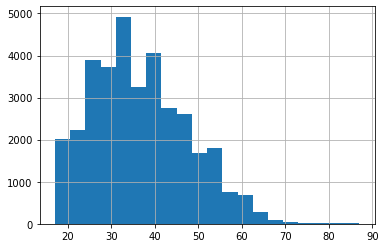

In [66]:
# распределение нашей потребительской базы по возрасту
df['Customer Age'].hist(bins=20)

<AxesSubplot:xlabel='Weekday'>

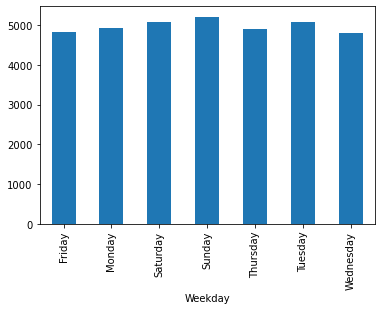

In [67]:
# в какие дни недели было больше всего продаж
df.groupby('Weekday')['Revenue'].size().plot(kind='bar')

In [68]:
# подробная таблица со статистическими показателями
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,IncomePerUnitPercentage
count,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,17432.500000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870074,64.865542,39.351919,0.134072
std,10065.091579,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.650597,152.879908,104.934925,0.135443
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,-937.000000,-937.000000,-0.686732
25%,8716.250000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,5.000000,3.000000,0.061689
50%,17432.500000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,27.000000,14.500000,0.147940
75%,26148.750000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,96.000000,53.000000,0.225689
max,34865.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,1842.000000,1842.000000,0.497500


In [69]:
# проверим, в какие месяцы было больше всего продаж в штуках
df.groupby('Month')['Quantity'].sum().sort_values(ascending = False)

Month
June         7342.0
May          7311.0
December     6796.0
April        6585.0
March        6335.0
February     5854.0
January      5766.0
October      5153.0
November     4975.0
August       4655.0
September    4606.0
July         4442.0
Name: Quantity, dtype: float64

<AxesSubplot:xlabel='Month'>

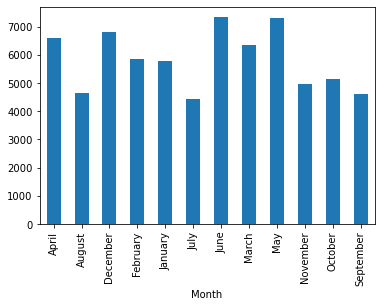

In [70]:
# Июнь и май являются лидерами по продажам
df.groupby('Month')['Quantity'].sum().plot(kind='bar')

In [75]:
# Найдем значения z-score для 
z_score = scipy.stats.zscore(df['IncomePerUnitPercentage'])
z_score 


0        0.974468
1        0.046359
2        0.974061
3        0.848007
4        0.191434
           ...   
34861   -3.780341
34862   -2.297228
34863   -3.163362
34864   -2.600866
34865   -4.530849
Name: IncomePerUnitPercentage, Length: 34866, dtype: float64

<AxesSubplot:>

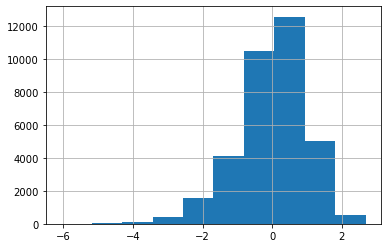

In [77]:
# смотрим на распределение z-оценок для дохода в процентах. На графике мы видим, что существуют выбросы (<-3 и > 3)
z_score.hist()

C:\Users\akaragyaur\AppData\Local\Temp\ipykernel_22628\3155053967.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_sum = df.groupby(df['Date'].dt.week)['Revenue'].sum()


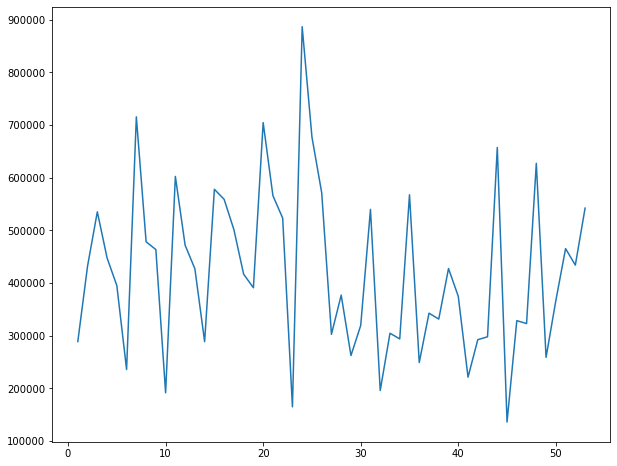

In [79]:
# линейный график, показывающий динамику продаж по неделям
df_sum = df.groupby(df['Date'].dt.week)['Revenue'].sum() 
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df_sum)

# Корреляция

In [80]:
# выведем общую таблицу корреляции для датасета
df.corr()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,IncomePerUnitPercentage
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083341,-0.033964,-0.030178,0.011487
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,0.259750,0.228753,0.438813
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.012897,0.012779,0.003410
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,0.003095,-0.163186,0.003003
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.171575,0.241476,-0.301216
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.338498,0.425003,-0.180372
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.201258,0.177784,-0.349991
Revenue,-0.083341,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.396183,0.352048,-0.211052
Income,-0.033964,0.259750,0.012897,0.003095,0.171575,0.338498,0.201258,0.396183,1.000000,0.893362,0.563827
IncomePerUnit,-0.030178,0.228753,0.012779,-0.163186,0.241476,0.425003,0.177784,0.352048,0.893362,1.000000,0.503625


In [81]:
# переведем значения пола в бинарный формат, где 0 - женщина, 1 - мужчина
df['Customer Gender'] = df['Customer Gender'].apply(lambda x: 1 if x == 'M' else 0)
df

,index,Date,Year,Month,Customer Age,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,Weekday,IncomePerUnitPercentage
0,0,2016-02-19,2016.0,February,29.0,0,United States,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0,29.000000,Friday,0.266055
1,1,2016-02-20,2016.0,February,29.0,0,United States,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0,4.000000,Saturday,0.140351
2,2,2016-02-27,2016.0,February,29.0,0,United States,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0,1.330000,Saturday,0.266000
3,3,2016-12-03,2016.0,March,29.0,0,United States,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0,29.000000,Saturday,0.248927
4,4,2016-12-03,2016.0,March,29.0,0,United States,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0,6.666667,Saturday,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0,-562.0,-562.000000,Sunday,-0.377942
34862,34862,2016-07-02,2016.0,February,38.0,1,France,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0,-349.0,-174.500000,Saturday,-0.177067
34863,34863,2015-03-13,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0,-466.0,-466.000000,Friday,-0.294378
34864,34864,2015-05-04,2015.0,April,38.0,1,France,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0,-367.0,-122.333333,Monday,-0.218193


<AxesSubplot:xlabel='Unit Cost', ylabel='IncomePerUnitPercentage'>

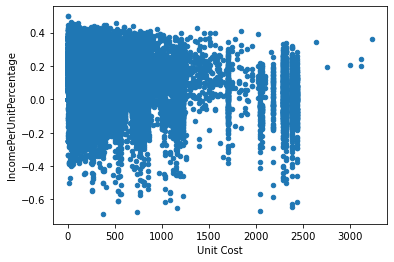

In [88]:
# построим график рассеяния, чтобы посмотреть зависимость между себестоимостью товара и доходом от продаж в процентах
df.plot('Unit Cost', 'IncomePerUnitPercentage', kind='scatter')

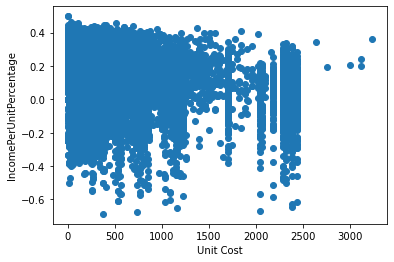

In [89]:
# сделаем тоже самое через библиотеку matplotlib
plt.xlabel('Unit Cost')
plt.ylabel('IncomePerUnitPercentage')
plt.scatter(x=df['Unit Cost'], y=df['IncomePerUnitPercentage'])

<AxesSubplot:xlabel='Quantity', ylabel='Unit Price'>

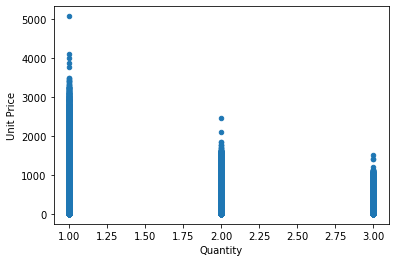

In [83]:
# можно увидеть негативную зависимость между ценой продажи и купленного количества
df.plot('Quantity', 'Unit Price', kind='scatter')

In [85]:
Country = df.groupby(['Product Category', 'Date'])['IncomePerUnitPercentage'].sum()
Country

Product Category  Date      
Accessories       2015-01-07    3.001785
                  2015-01-08    5.256976
                  2015-01-09    3.739140
                  2015-01-10    9.168677
                  2015-01-11    3.892954
                                  ...   
Clothing          2016-12-03    3.979227
                  2016-12-04    3.866776
                  2016-12-05    3.190896
                  2016-12-06    3.064106
                  2016-12-07    0.903324
Name: IncomePerUnitPercentage, Length: 1336, dtype: float64

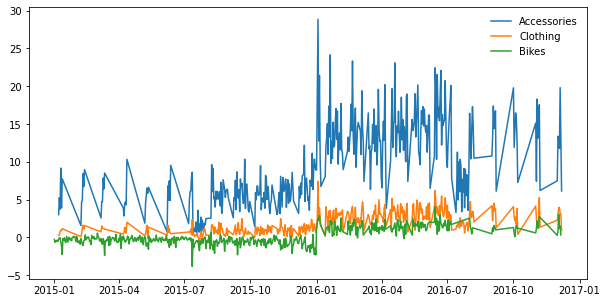

In [86]:
# сравним процент дохода от продаж разных категорий
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Country.loc['Accessories'])
ax.plot(Country.loc['Clothing'])
ax.plot(Country.loc['Bikes'])
ax.legend(['Accessories', 'Clothing', 'Bikes'], frameon=False)

In [90]:
# введем новую переменную и построим линейный график, показывающий разницу в выручке по странам
df_1 = df.groupby('Country')['Revenue'].mean()
df_1

Country
France            666.815789
Germany           816.094982
United Kingdom    665.974147
United States     574.117172
Name: Revenue, dtype: float64

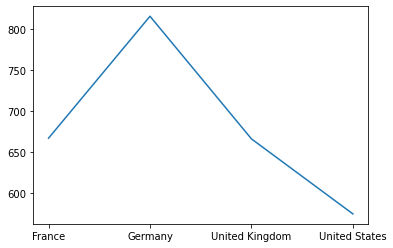

In [91]:
plt.plot(df_1)

Text(0.5, 1.0, 'Violin Plot')

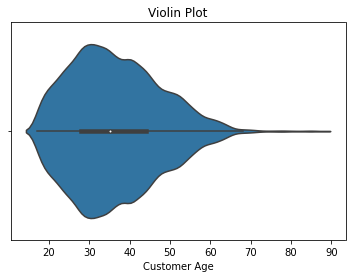

In [92]:
# Построим скрипичную диаграмму и ящик с усами для наглядного представления распределения возраста наших покупателей. 
# Графики наглядно показывают медиану, диапазон данных и область распределения
sns.violinplot(x=df['Customer Age']).set_title('Violin Plot')

Text(0.5, 1.0, 'Boxplot')

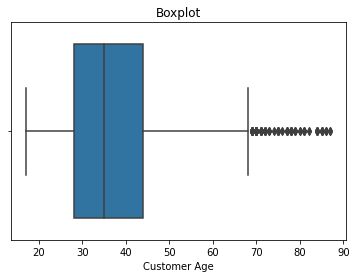

In [93]:
sns.boxplot(x=df['Customer Age']).set_title('Boxplot')

In [94]:
df.groupby('Customer Gender')['Revenue'].sum()

Customer Gender
0    10932634.0
1    11411942.0
Name: Revenue, dtype: float64

C:\Users\akaragyaur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Gender', ylabel='Revenue'>

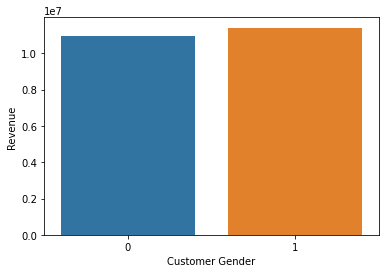

In [95]:
# сравним распределение мужчин и женщин в выручке компании
sns.barplot(df.groupby('Customer Gender')['Revenue'].sum().index, y=df.groupby('Customer Gender')['Revenue'].sum())

C:\Users\akaragyaur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='Revenue'>

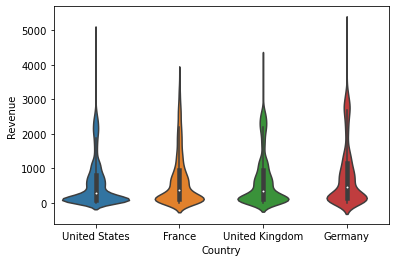

In [98]:
# сравним распределения стоимости покупок потребителей в разных странах. Видно, что в США и Германии потребители чаще совершают дорогие покупки
sns.violinplot(df['Country'], y=df['Revenue'])

In [100]:
num_features = df[['Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Income', 'IncomePerUnit']]
num_features

,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit
0,80.00,109.000000,80.0,109.0,29.0,29.000000
1,24.50,28.500000,49.0,57.0,8.0,4.000000
2,3.67,5.000000,11.0,15.0,4.0,1.330000
3,87.50,116.500000,175.0,233.0,58.0,29.000000
4,35.00,41.666667,105.0,125.0,20.0,6.666667
...,...,...,...,...,...,...
34861,2049.00,1487.000000,2049.0,1487.0,-562.0,-562.000000
34862,1160.00,985.500000,2320.0,1971.0,-349.0,-174.500000
34863,2049.00,1583.000000,2049.0,1583.0,-466.0,-466.000000
34864,683.00,560.666667,2049.0,1682.0,-367.0,-122.333333


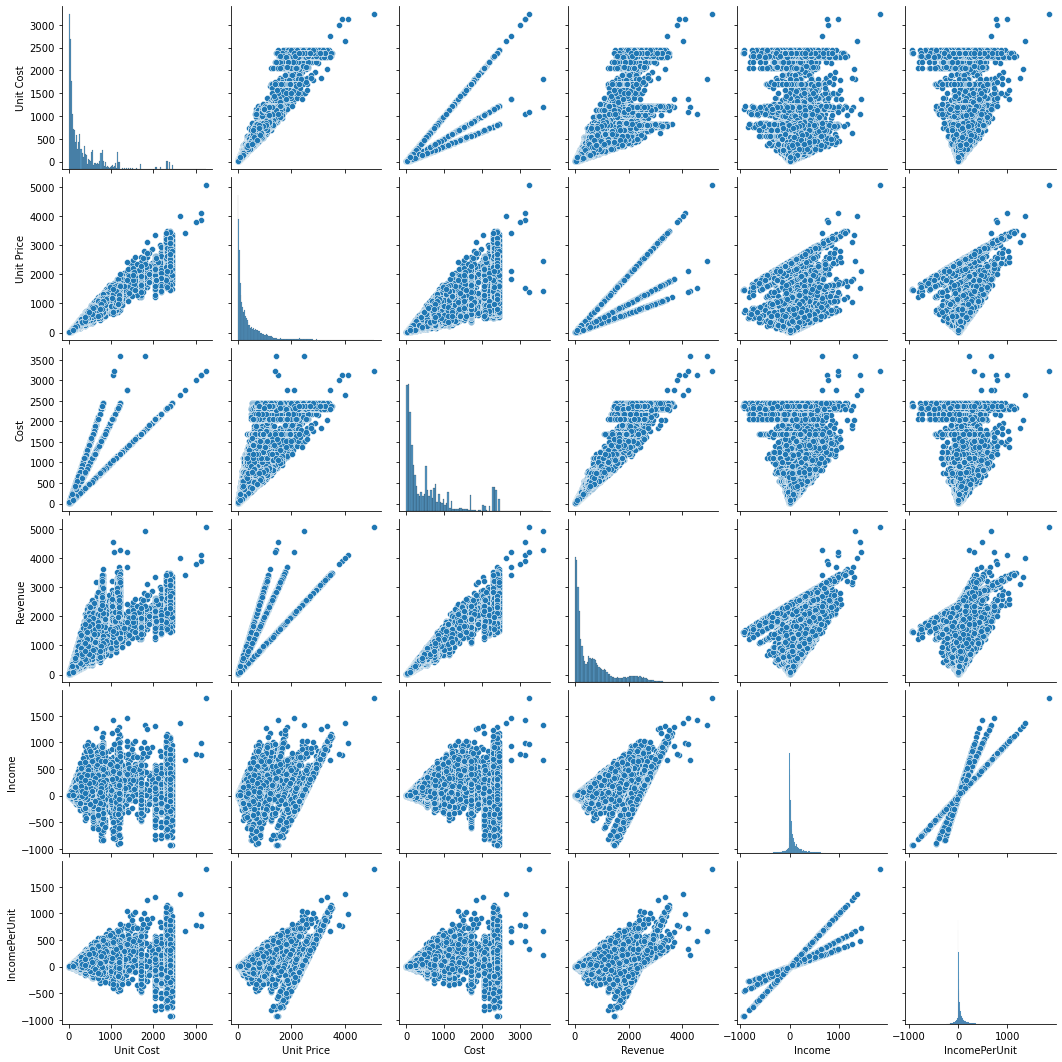

In [101]:
# наглядно показаны корреляции между количественными переменными
sns.pairplot(num_features)

## Интерактивные графики

In [102]:
!pip install plotly==4.14.3
import plotly.graph_objects as go
import plotly.express as px

In [138]:
# Создадим выборку из продаж горных велосипедов и попробуем визуализировать данные 
Mountain_bikes = df[df['Sub Category'] == 'Mountain Bikes']
Mountain_bikes

,index,Date,Year,Month,Customer Age,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,Weekday,IncomePerUnitPercentage
49,49,2016-11-06,2016.0,June,18.0,1,United States,Bikes,Mountain Bikes,1.0,769.0,875.0,769.0,875.0,106.0,106.0,Sunday,0.121143
50,50,2015-08-13,2015.0,August,18.0,1,United States,Bikes,Mountain Bikes,1.0,2295.0,2242.0,2295.0,2242.0,-53.0,-53.0,Thursday,-0.023640
51,51,2015-10-09,2015.0,September,18.0,1,United States,Bikes,Mountain Bikes,1.0,769.0,776.0,769.0,776.0,7.0,7.0,Friday,0.009021
52,52,2015-10-20,2015.0,October,18.0,1,United States,Bikes,Mountain Bikes,2.0,1160.0,1005.0,2320.0,2010.0,-310.0,-155.0,Tuesday,-0.154229
53,53,2015-12-21,2015.0,December,18.0,1,United States,Bikes,Mountain Bikes,1.0,2295.0,2303.0,2295.0,2303.0,8.0,8.0,Monday,0.003474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.0,1487.0,2049.0,1487.0,-562.0,-562.0,Sunday,-0.377942
34862,34862,2016-07-02,2016.0,February,38.0,1,France,Bikes,Mountain Bikes,2.0,1160.0,985.5,2320.0,1971.0,-349.0,-174.5,Saturday,-0.177067
34863,34863,2015-03-13,2015.0,March,38.0,1,France,Bikes,Mountain Bikes,1.0,2049.0,1583.0,2049.0,1583.0,-466.0,-466.0,Friday,-0.294378
34864,34864,2015-05-04,2015.0,April,38.0,1,France,Bikes,Mountain Bikes,3.0,683.0,560.7,2049.0,1682.0,-367.0,-122.3,Monday,-0.218120


In [139]:
Mountain_bikes.groupby('Country')['Revenue'].sum()

Country
France             766022.0
Germany           1031306.0
United Kingdom     958058.0
United States     2421070.0
Name: Revenue, dtype: float64

In [140]:
df['Country'].value_counts()

United States     18076
United Kingdom     6421
Germany            5201
France             5168
Name: Country, dtype: int64

In [141]:
# Создадим интеркативных график, показывающий продажи горных велоспиедов в сравнении по странам
Mountain_bikes_graph = go.Bar(x=Mountain_bikes['Country'], y=Mountain_bikes['Revenue'])

layout = go.Layout(title='Продажи горных велосипедов по странам 2015-2016')
fig = go.Figure(data=Mountain_bikes_graph, layout=layout)
fig

In [142]:
# Интерактивный график показывает зависимость между себестоимостью горного велосипеда и процентом дохода от продаж этого велосипеда
# Также, на графике можно счесть информацию о стране, в которой был продан горный велосипед и выручку от продаж
# Вывод: Можно заметить негативную корреляцию между себестоимостью и доходом. Мы видим, что товары с низкой себестоимостью дают больше дохода в процентах.
# Вывод2: можно увидеть, что в Германии продажи горных велосипедов были более маржинальны
px.scatter(Mountain_bikes, x ='IncomePerUnitPercentage', y='Unit Cost', size='Revenue',
          color='Country', hover_name='Country', log_x=True,
          animation_frame='Year', size_max=10)

In [152]:
#Теперь проверим гипотезу о зависимости между полом клиента и количеством купленных вещей для категории горных велосипедов
X2 = Mountain_bikes.groupby('Quantity')['Customer Gender'].value_counts().unstack()
X2

Customer Gender,0,1
Quantity,,
1.0,464,439
2.0,450,456
3.0,478,450


In [153]:
scipy.stats.chi2_contingency(X2)
# значение критерия, стат значимость, кол-во степеней свободы, матрица наблюдаемых частот)

(0.7698389635099832,
 0.6805054271014335,
 2,
 array([[459.25319693, 443.74680307],
        [460.77895506, 445.22104494],
        [471.96784801, 456.03215199]]))

In [156]:
# проверим, есть ли разница между средним чеком женщин и мужчин из Соединенных Штатов Америки
us_w = df[(df['Customer Gender'] == 0) & (df['Country'] == 'United States')]
us_m = df[(df['Customer Gender'] == 1) & (df['Country'] == 'United States')]

In [157]:
us_w_ttest = us_w['Cost']
us_m_ttest = us_m['Cost']
us_m_ttest

49        769.0
50       2295.0
51        769.0
52       2320.0
53       2295.0
          ...  
34581     140.0
34582      10.0
34583     636.0
34584     159.0
34625     648.0
Name: Cost, Length: 9377, dtype: float64

In [158]:
# вероятность того, что при тестировани гипотезы нам попались критические значения - большая
scipy.stats.ttest_ind(us_w_ttest, us_m_ttest, equal_var=False)

Ttest_indResult(statistic=0.7170330002018729, pvalue=0.47336313152070486)

In [162]:
#Проверим зависимость процента дохода от себестоимости продукта
X = gloves_germany['IncomePerUnitPercentage']
y = gloves_germany['Unit Cost']

res = scipy.stats.linregress(X,y)
print(res)

LinregressResult(slope=-279.8838626728979, intercept=323.28326041312835, rvalue=-0.09051898645807453, pvalue=0.5191865740102913, stderr=431.1878577226686, intercept_stderr=135.67107388343402)


In [163]:
r_sq = res.rvalue ** 2
print(r_sq)

0.00819368690939708


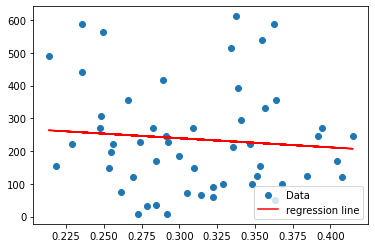

In [164]:
#Выведем на график зависимость процента дохода от продажи продукта от себестоимости продукта 
plt.scatter(X, y, label = 'Data')
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'regression line')
plt.legend()
plt.show()

In [165]:
# Создадим датафрейм, показывающий продажи подкатегории "Перчатки" в Германии
gloves_germany= df[(df['Sub Category'] == 'Gloves') & (df['Country'] == 'Germany')]
gloves_germany

,index,Date,Year,Month,Customer Age,Customer Gender,Country,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Income,IncomePerUnit,Weekday,IncomePerUnitPercentage
768,768,2016-02-28,2016,February,54.0,0,Germany,Clothing,Gloves,1.0,122.00,167.0,122.0,167.0,45.0,45.0,Sunday,0.269461
863,863,2016-05-02,2016,February,43.0,1,Germany,Clothing,Gloves,1.0,245.00,403.0,245.0,403.0,158.0,158.0,Monday,0.392060
3209,3209,2016-11-06,2016,June,48.0,1,Germany,Clothing,Gloves,2.0,220.50,296.5,441.0,593.0,152.0,76.0,Sunday,0.256324
4125,4125,2016-01-19,2016,January,28.0,1,Germany,Clothing,Gloves,2.0,269.50,358.0,539.0,716.0,177.0,88.5,Tuesday,0.247207
4126,4126,2016-02-25,2016,February,28.0,1,Germany,Clothing,Gloves,1.0,196.00,263.0,196.0,263.0,67.0,67.0,Thursday,0.254753
4191,4191,2016-05-05,2016,May,44.0,1,Germany,Clothing,Gloves,2.0,330.50,513.5,661.0,1027.0,366.0,183.0,Thursday,0.356378
4422,4422,2016-07-27,2016,July,29.0,0,Germany,Clothing,Gloves,2.0,183.50,262.0,367.0,524.0,157.0,78.5,Wednesday,0.299618
6175,6175,2016-03-03,2016,March,26.0,1,Germany,Clothing,Gloves,2.0,61.00,90.0,122.0,180.0,58.0,29.0,Thursday,0.322222
6434,6434,2016-04-17,2016,April,29.0,1,Germany,Clothing,Gloves,1.0,588.00,769.0,588.0,769.0,181.0,181.0,Sunday,0.235371
6654,6654,2016-01-18,2016,January,20.0,1,Germany,Clothing,Gloves,3.0,228.67,315.0,686.0,945.0,259.0,86.3,Monday,0.274063


In [169]:
# Также проверим зависимость процента прибыли продукта от его себестоимости на примере Подкатегории перчаток в Германии с помощью линейной регресии
X1 = gloves_germany['IncomePerUnitPercentage']
y1 = gloves_germany['Unit Cost']
X1_const = sm.add_constant(X1)

model = sm.OLS(y, X1_const)
res1 = model.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:              Unit Cost   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4213
Date:                Thu, 15 Dec 2022   Prob (F-statistic):              0.519
Time:                        01:19:50   Log-Likelihood:                -344.51
No. Observations:                  53   AIC:                             693.0
Df Residuals:                      51   BIC:                             697.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Спасибо!